In [6]:
import pandas as pd
import numpy as np

titanicData = pd.read_csv("titanic.csv")
print(titanicData.dropna())
meanImputation = titanicData.fillna(titanicData.mean(numeric_only=True))
medianImputation = titanicData.fillna(titanicData.median(numeric_only=True))
modeImputation = titanicData.fillna(titanicData.mode().iloc[0])

print("Mean Imputation\n", meanImputation)
print("Median Imputation\n", medianImputation)
print("Mode Imputation\n", modeImputation)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

Encoding Categorical Variables in a Car Evaluation Dataset
   - Task: Encode categorical variables in the Car Evaluation dataset using one-hot encoding and label encoding. Compare the results.
   - Dataset: Car Evaluation Dataset



In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = pd.read_csv("car_evaluation.csv")
print(data.head())

#Label Encoding
labelencoder = {}
lencodedData = data.copy()
for column in data.columns:
    le = LabelEncoder()
    lencodedData[column] = le.fit_transform(data[column])
    labelencoder[column] = le

print("\nLabel Encoded Data:")
print(lencodedData.head())

#One-Hot Encoding
categoricalCols = data.select_dtypes(include=['object', 'category']).columns
oneHoTEncodedData = pd.get_dummies(data, columns=categoricalCols, drop_first=True)

print("\nOne-Hot Encoded Data:")
print(oneHoTEncodedData.head())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Label Encoded Data:
   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2

One-Hot Encoded Data:
   vhigh_low  vhigh_med  vhigh_vhigh  vhigh.1_low  vhigh.1_med  vhigh.1_vhigh  \
0      False      False         True        False        False           True   
1      False      False         True        False        False           True   
2      False      False         True        False        False           True   
3      False      False         True        False        False           True   
4      False     

. Scaling Features in the Wine Quality Dataset
   - Task: Apply normalization and standardization to the features in the Wine Quality dataset. Analyze how scaling affects the distribution of data.
   - Dataset: Wine Quality Datase



      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

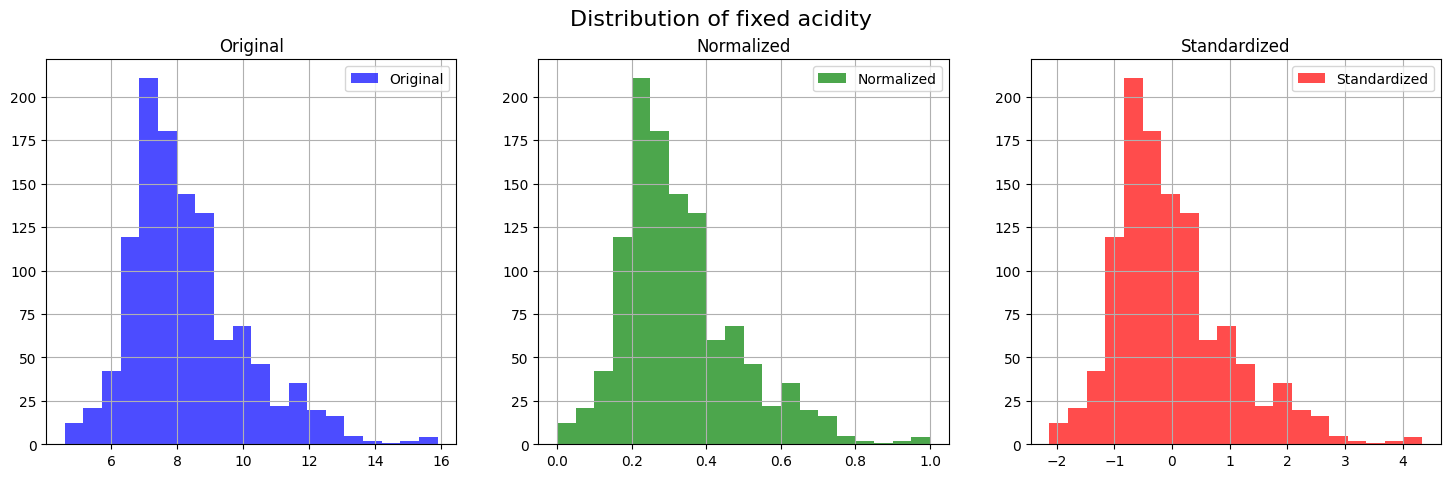

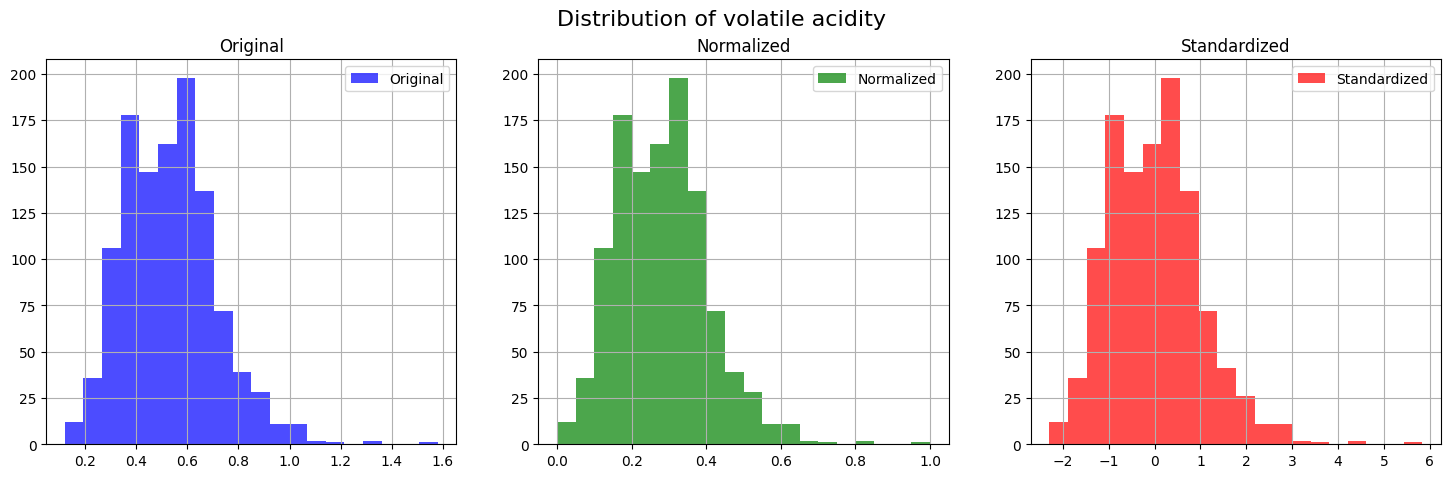

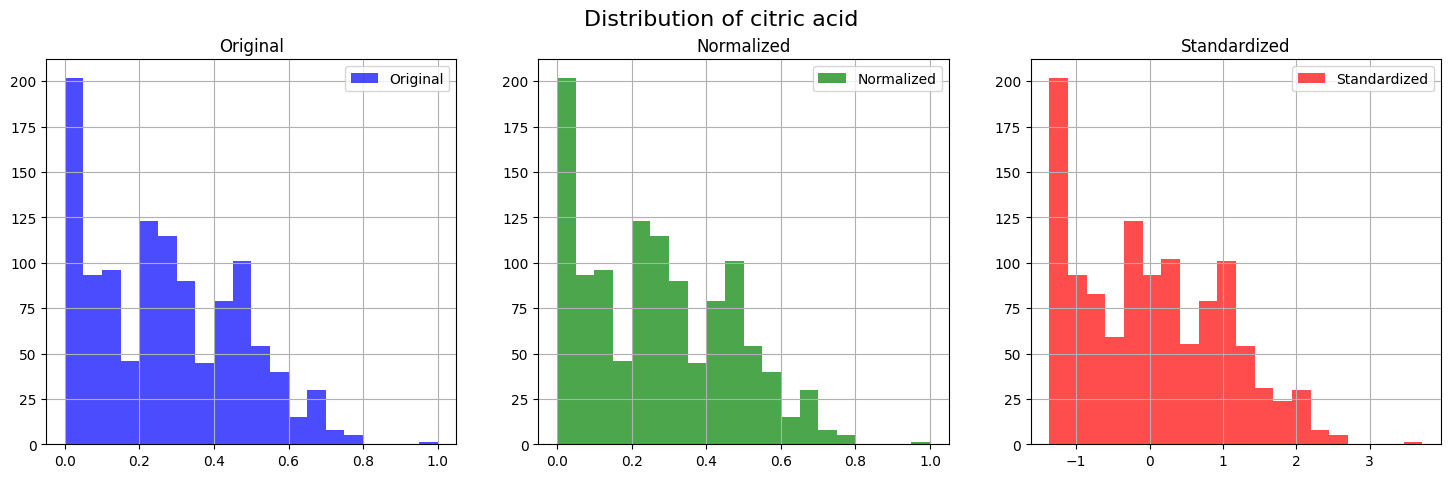

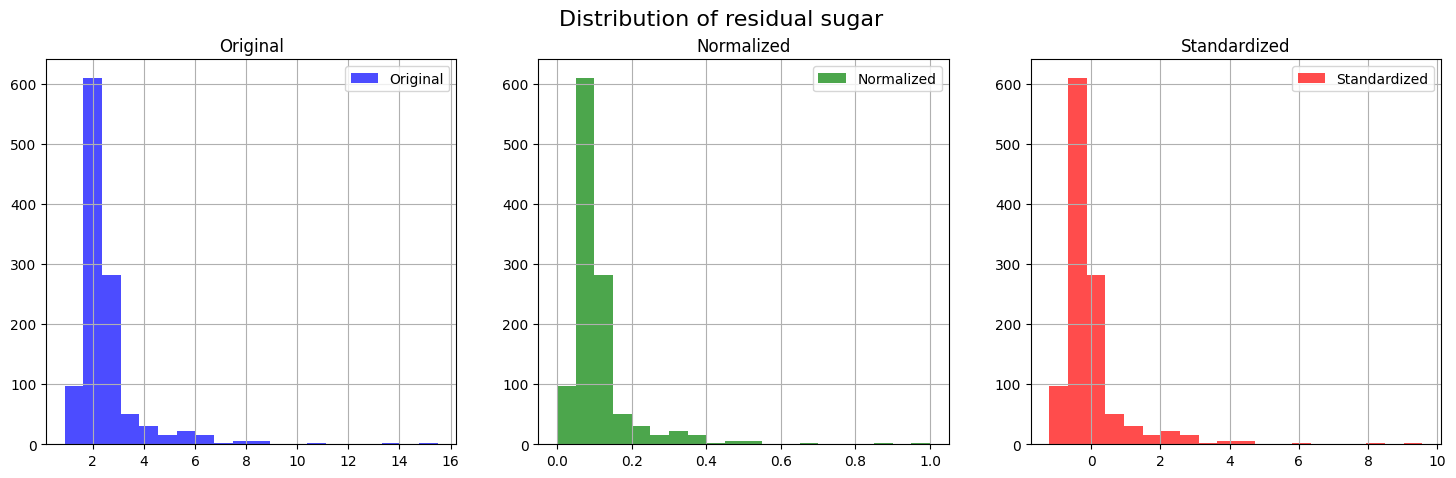

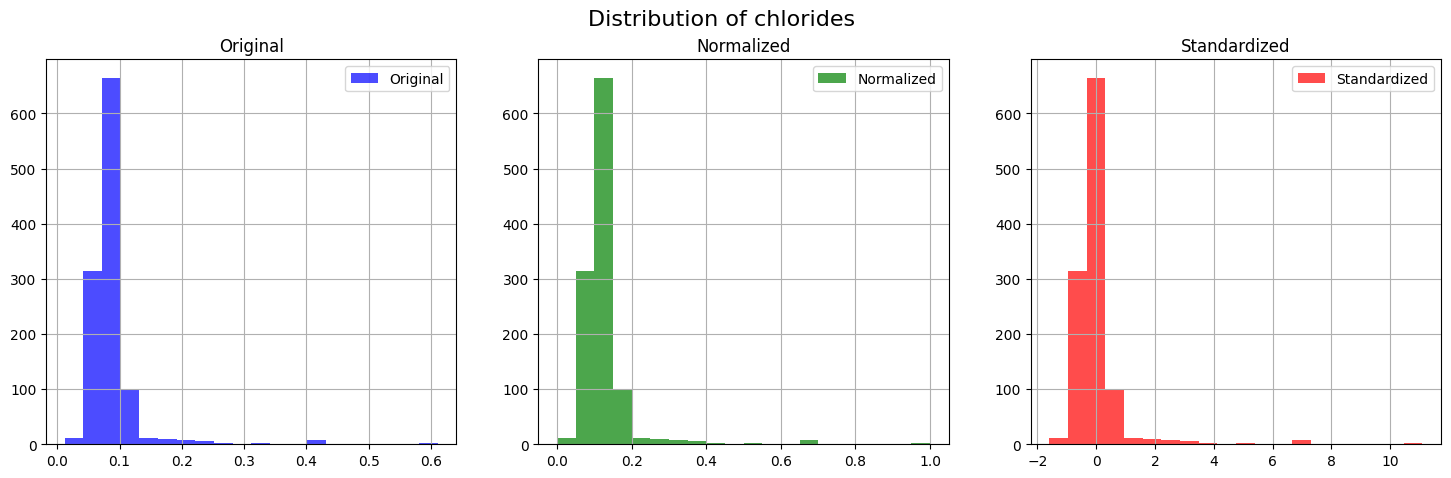

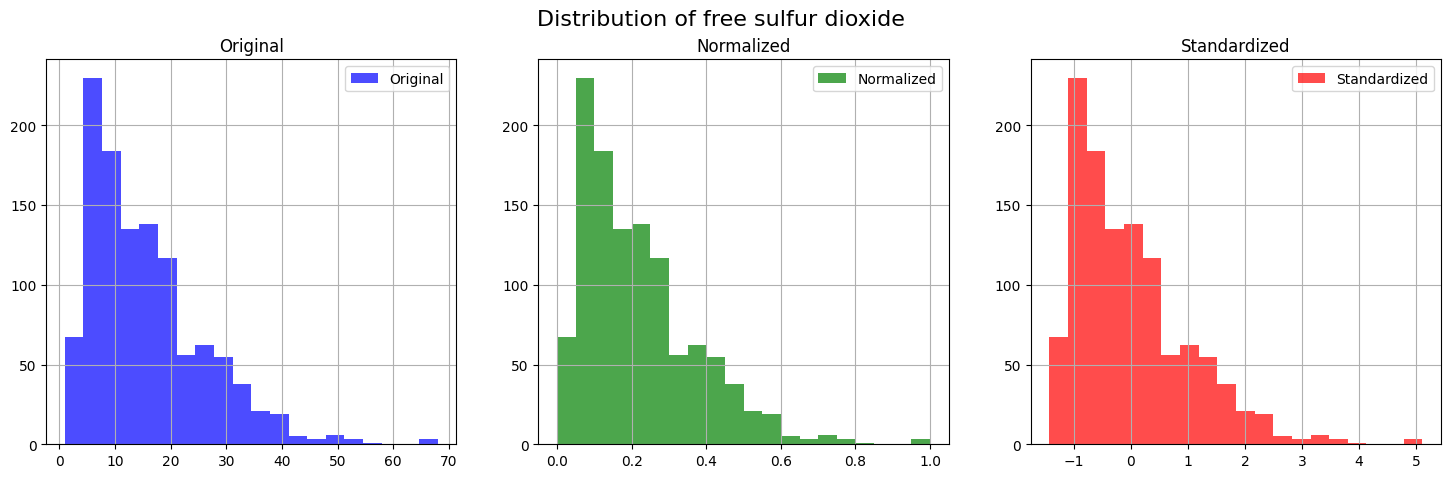

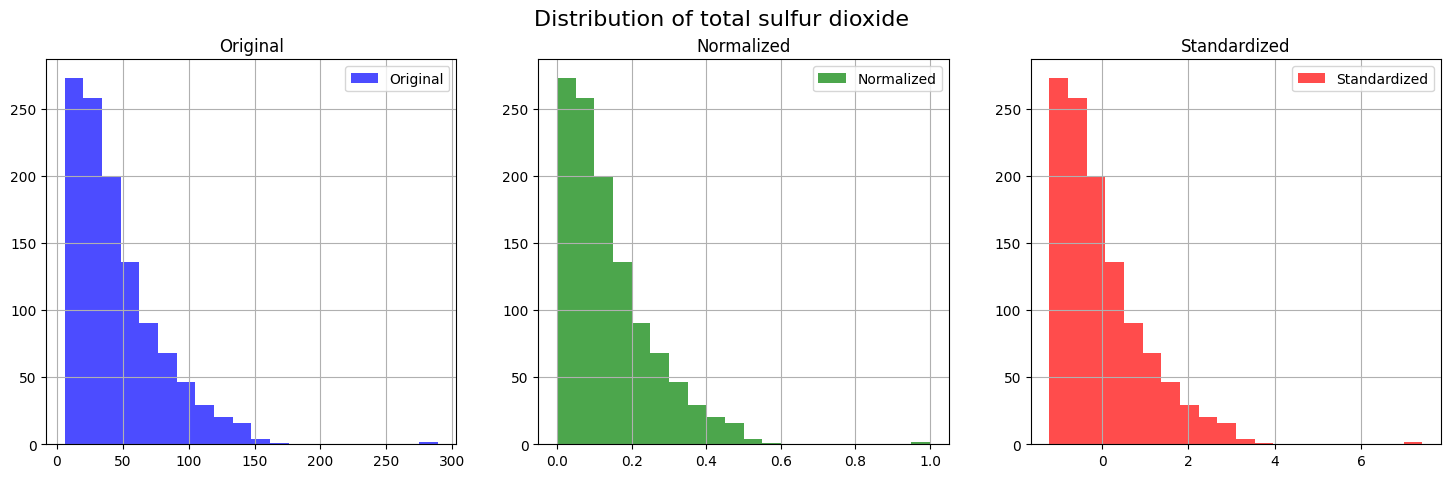

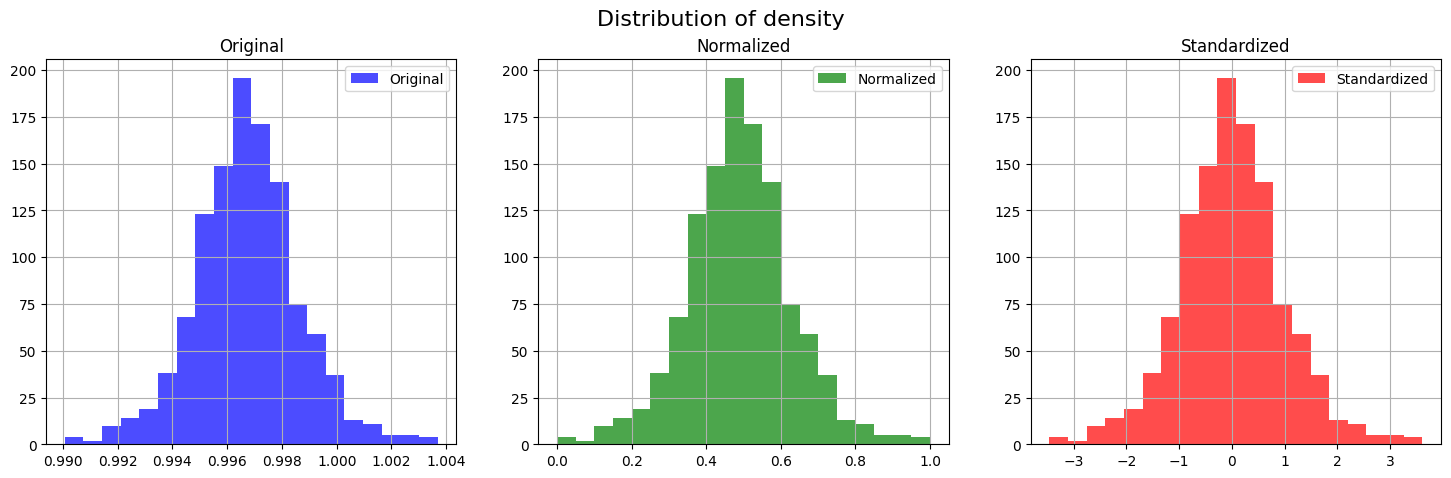

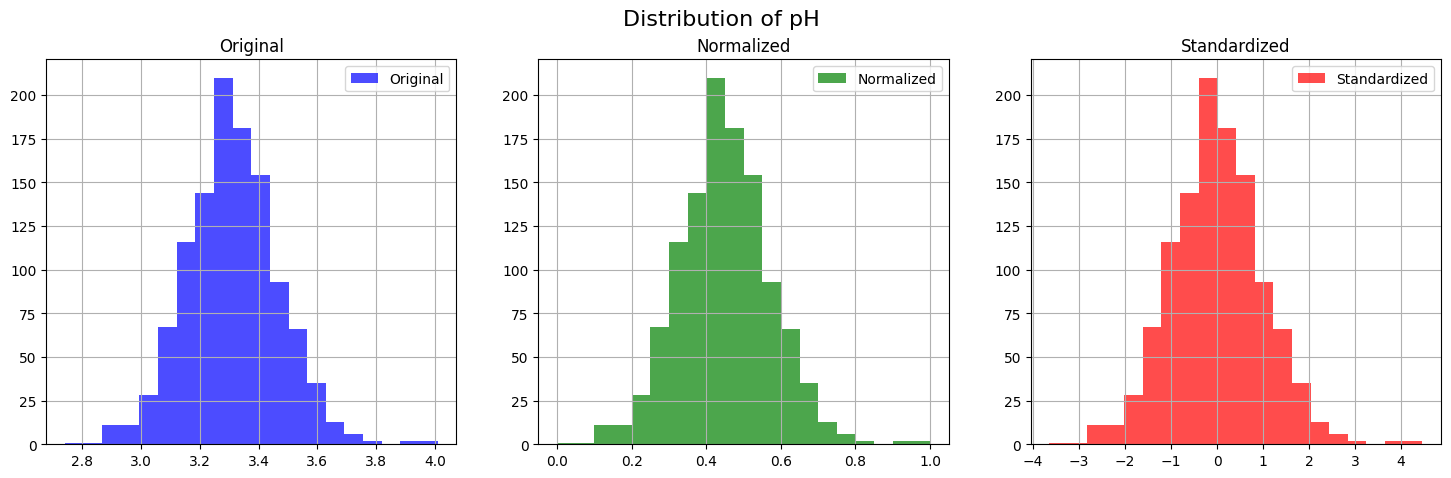

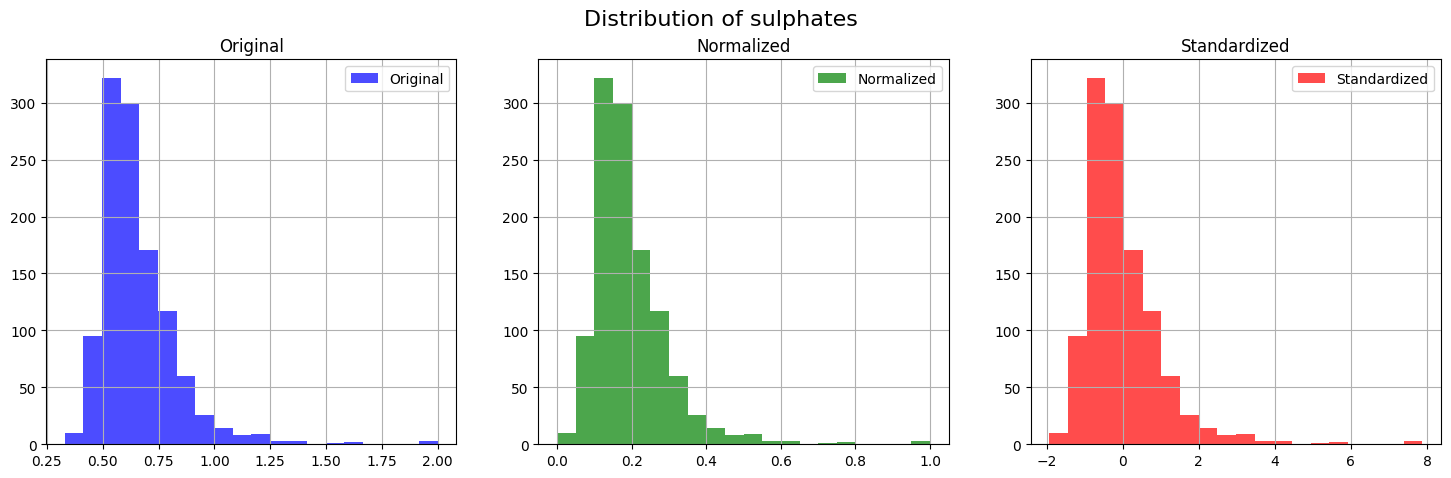

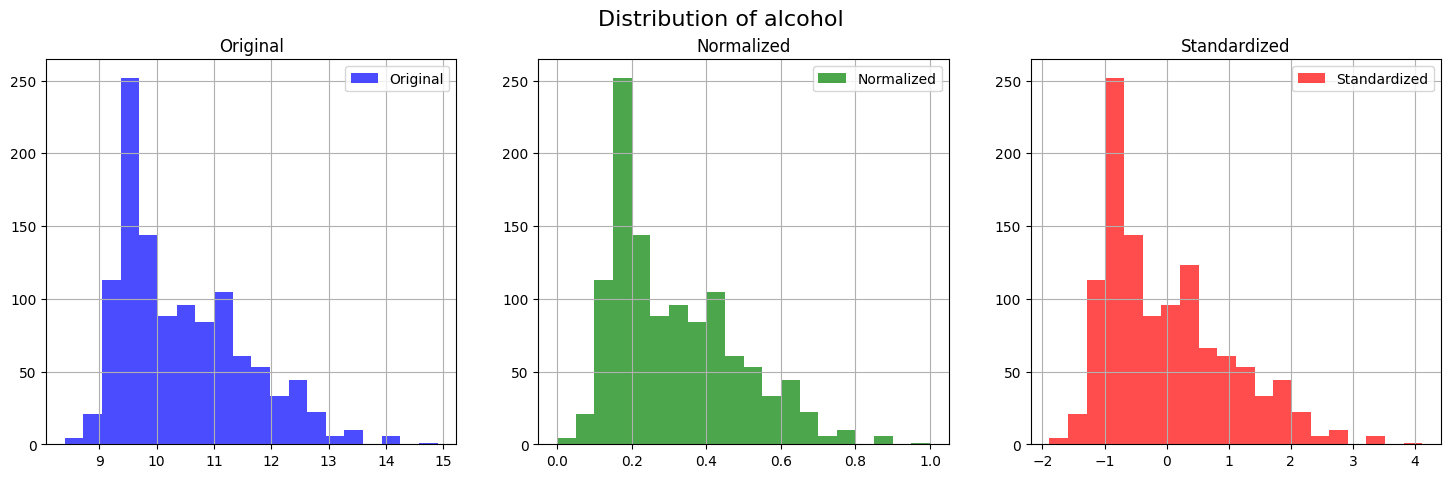

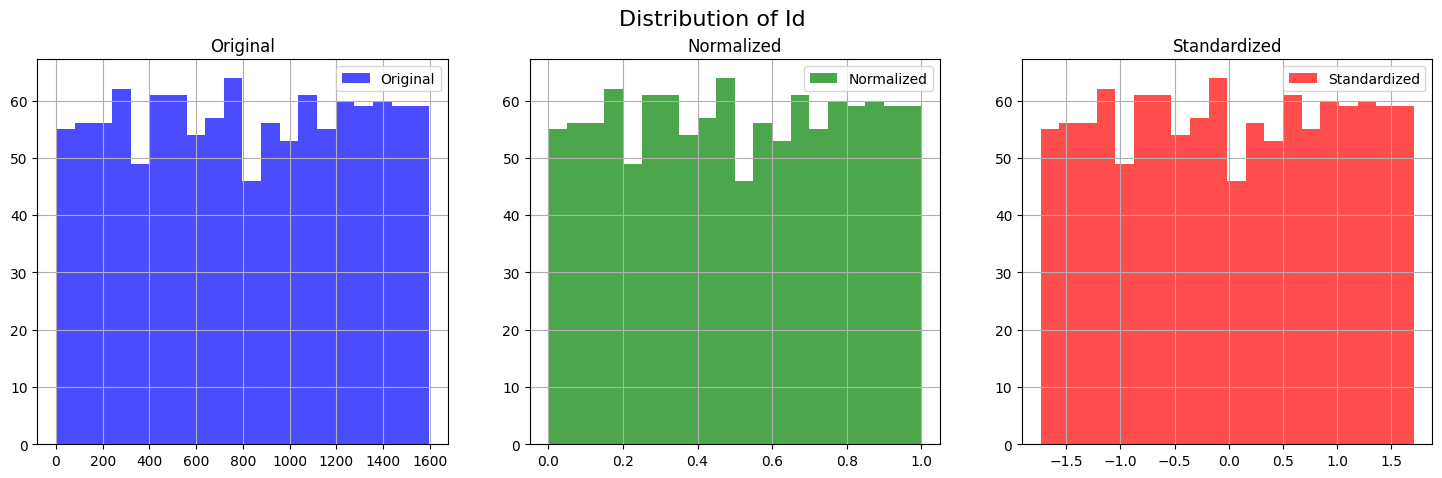

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

wineData = pd.read_csv('WineQT.csv')
print(wineData)

features = wineData.drop(columns=['quality'])
target = wineData['quality']

#Normalization
n = MinMaxScaler()
nFeatures = n.fit_transform(features)
nFeatures = pd.DataFrame(nFeatures, columns=features.columns)

#Standardization
scaler = StandardScaler()
sFeatures = scaler.fit_transform(features)
sFeatures = pd.DataFrame(sFeatures, columns=features.columns)

#Plotting distributions 
for feature in features.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Distribution of {feature}', fontsize=16)
    
    #Plotting original feature distribution
    axes[0].hist(features[feature], bins=20, color='yellow', alpha=0.7, label='Original')
    axes[0].set_title('Original')
    axes[0].legend()
    
    # Plotting normalized feature distribution
    axes[1].hist(nFeatures[feature], bins=20, color='green', alpha=0.7, label='Normalized')
    axes[1].set_title('Normalized')
    axes[1].legend()
   
    # Plotting standardized feature distribution
    axes[2].hist(sFeatures[feature], bins=20, color='red', alpha=0.7, label='Standardized')
    axes[2].set_title('Standardized')
    axes[2].legend()
    plt.show()


4. Handling Outliers in the Boston Housing Dataset
   - Task: Identify and handle outliers in the Boston Housing dataset using techniques like Z-score, IQR, and visualization methods.
   - Dataset: Boston Housing Dataset
   

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


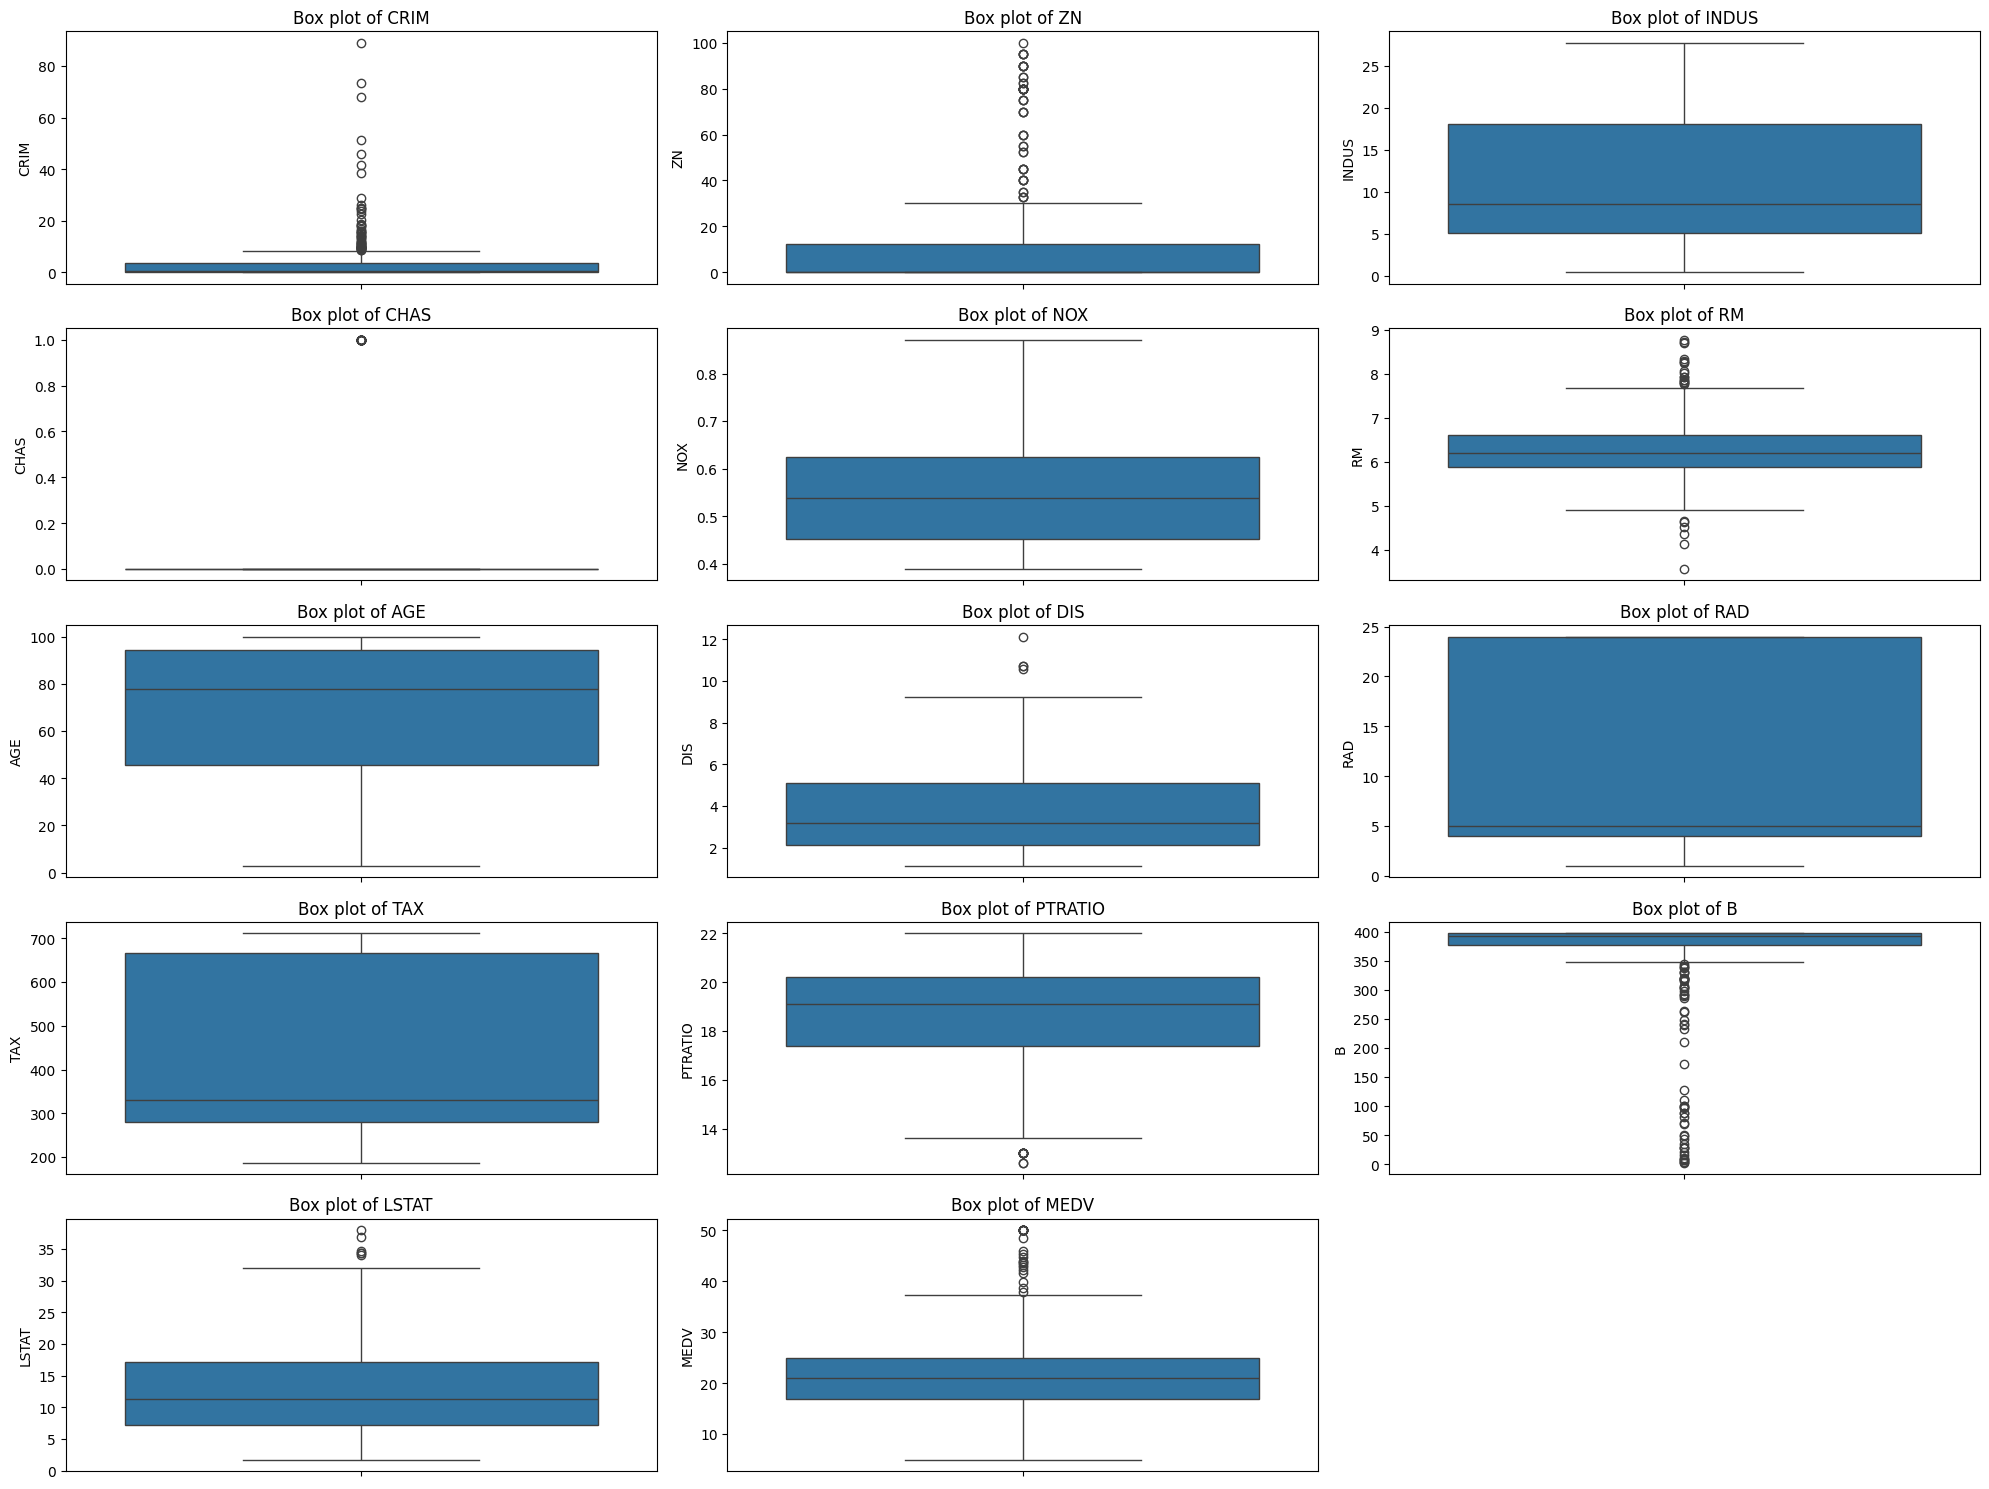

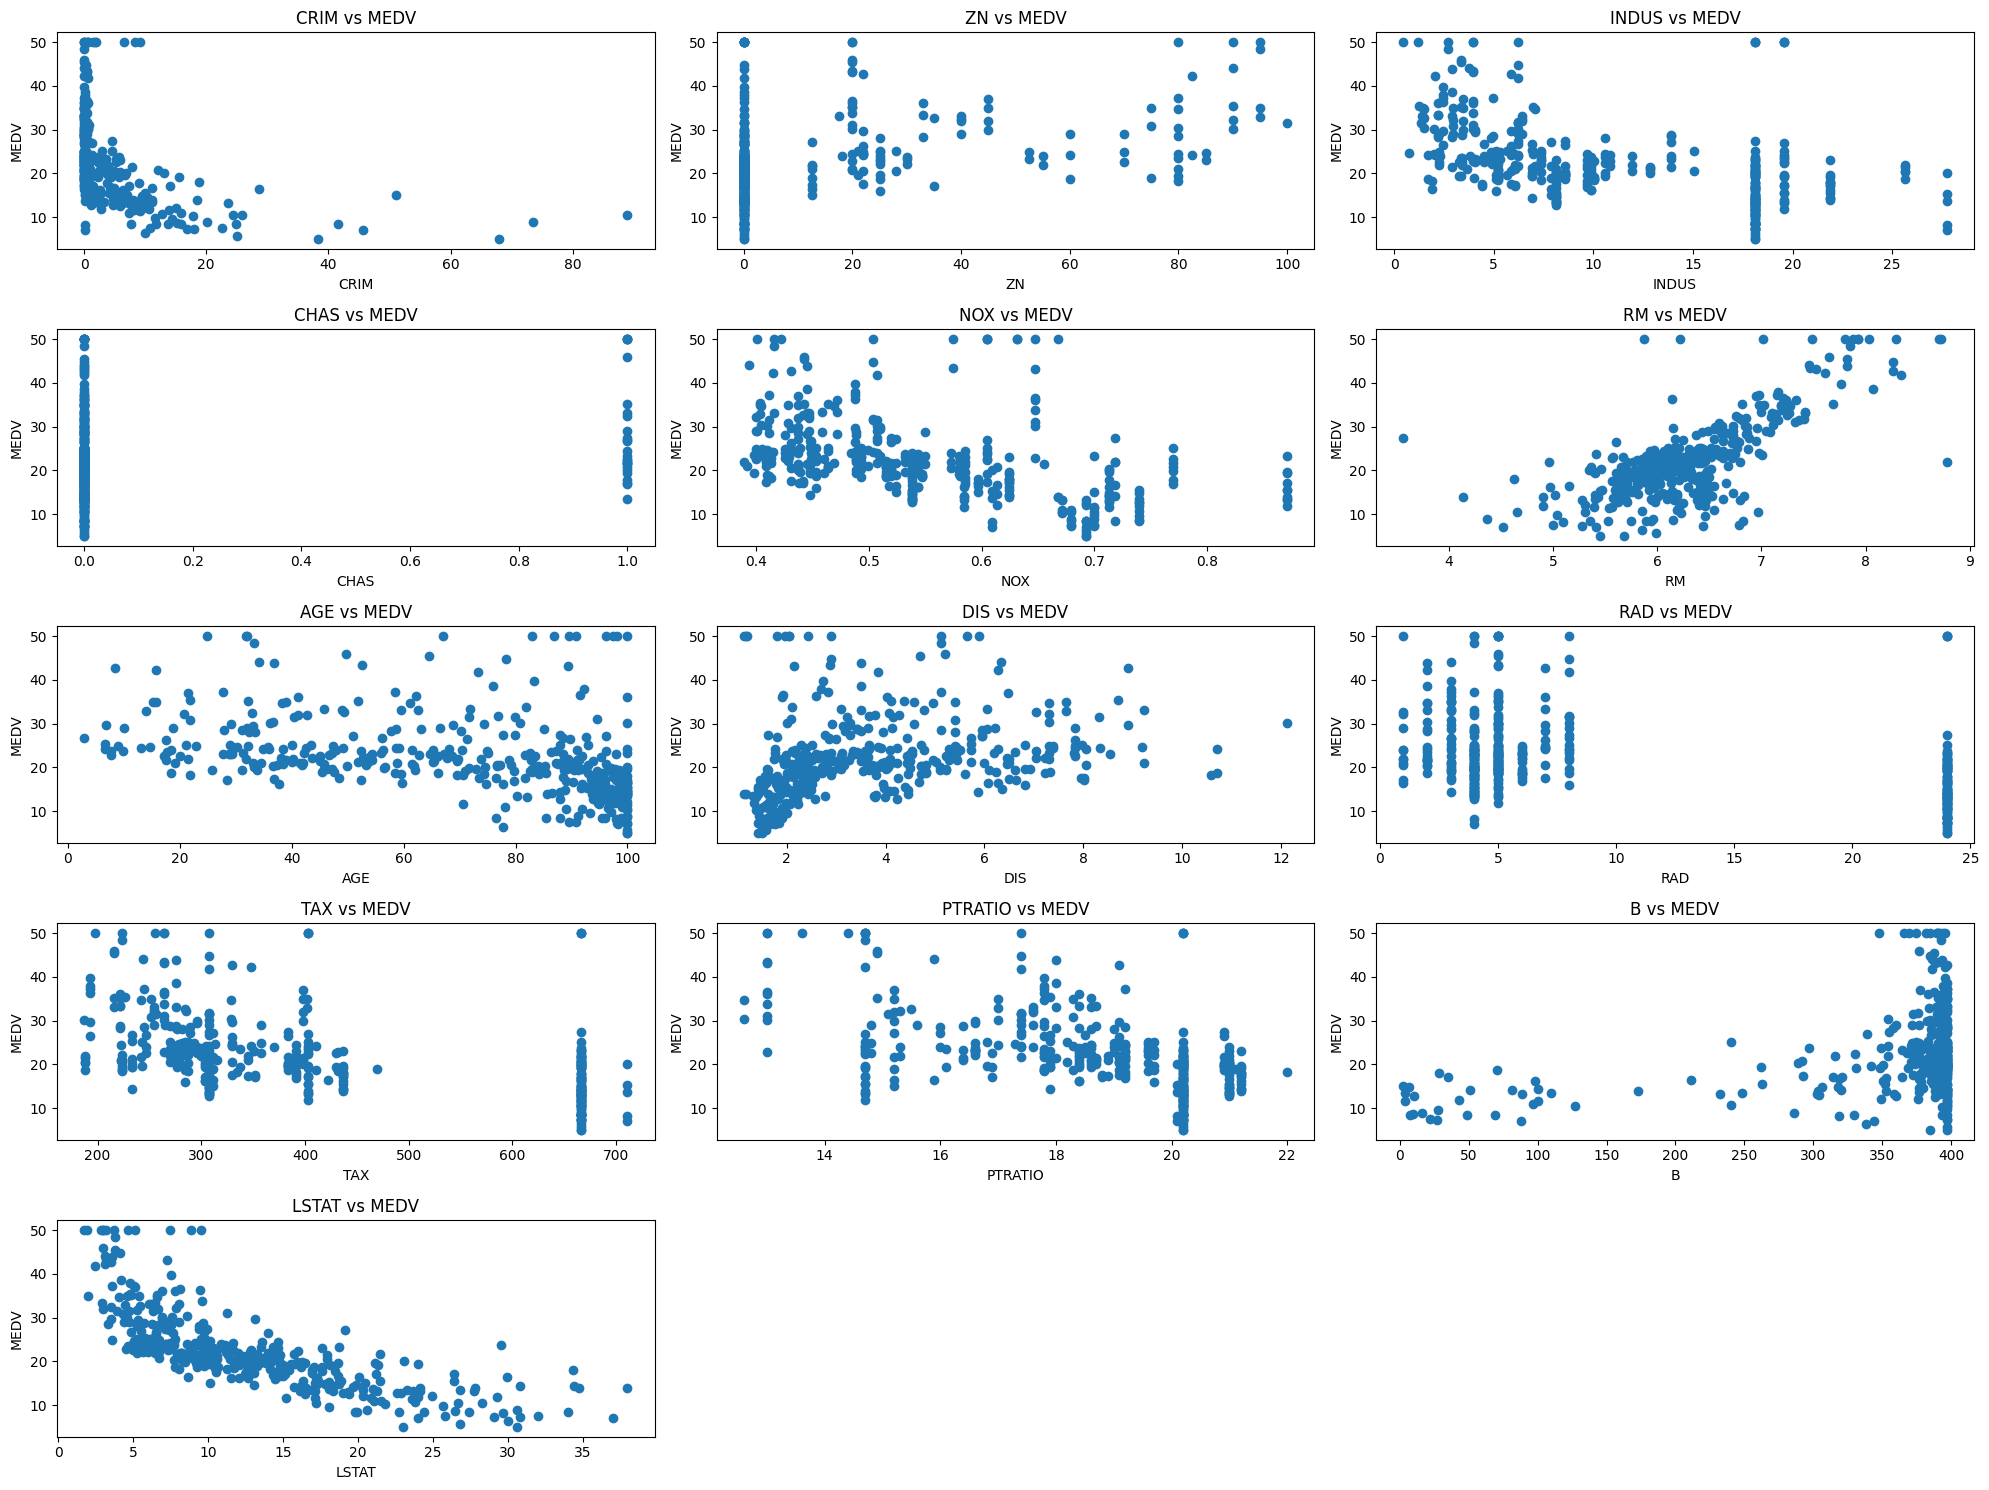

IQR:
 CRIM         3.354018
ZN          12.500000
INDUS       12.970000
CHAS         0.000000
NOX          0.171000
RM           0.726250
AGE         48.775000
DIS          3.006600
RAD         20.000000
TAX        385.750000
PTRATIO      2.800000
B           20.192500
LSTAT        9.992500
MEDV         8.200000
dtype: float64
Data without outliers=
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    

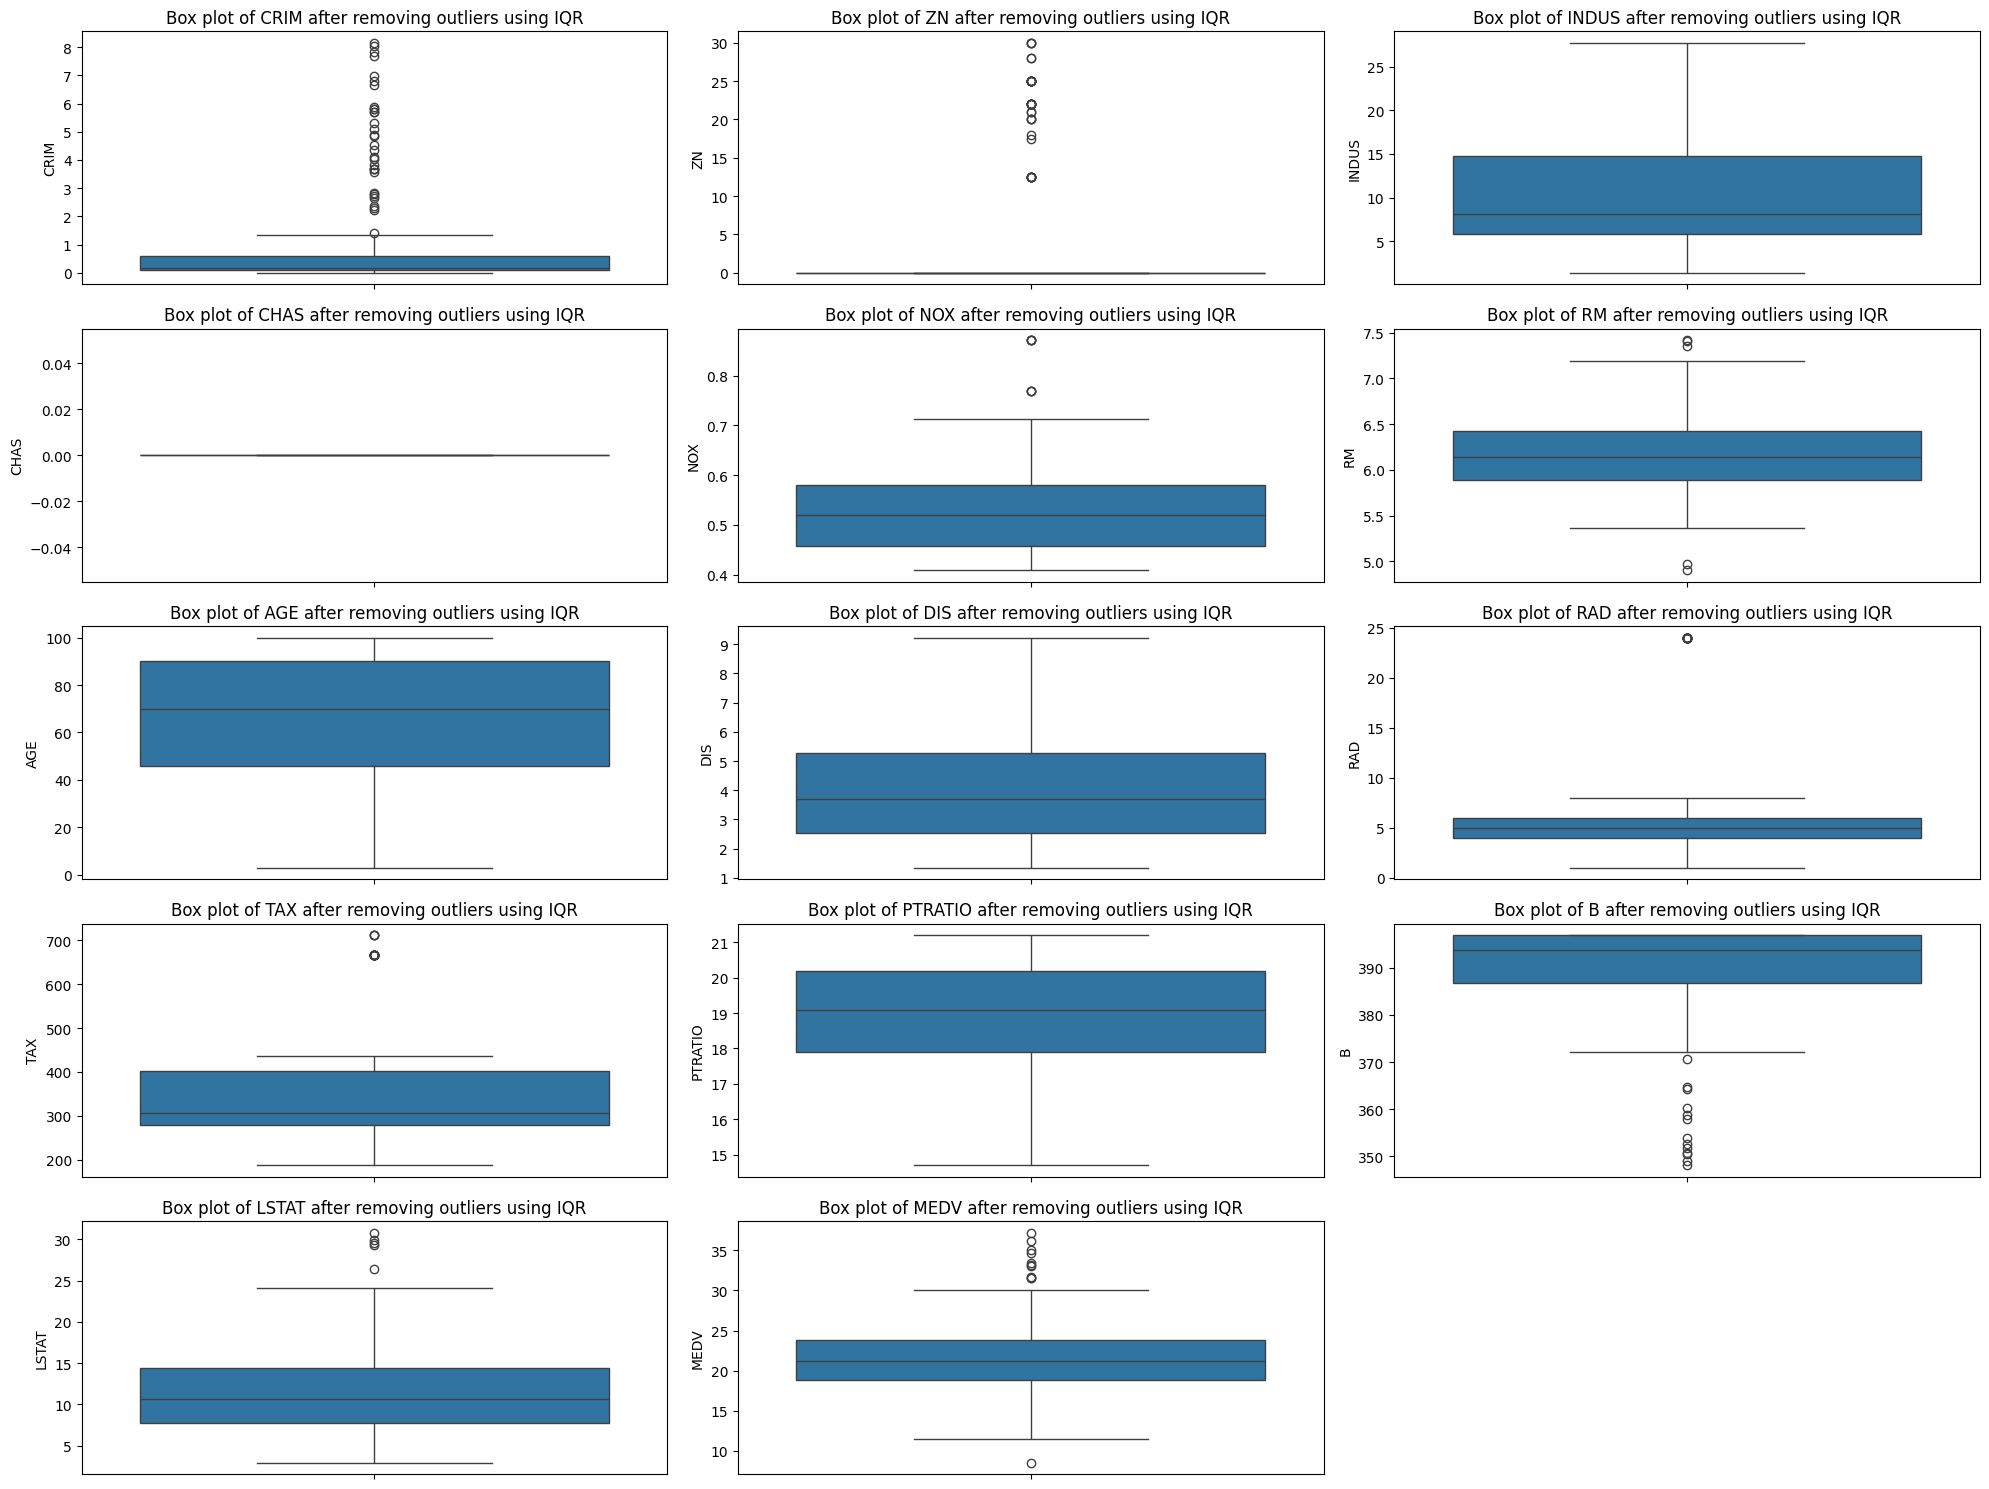

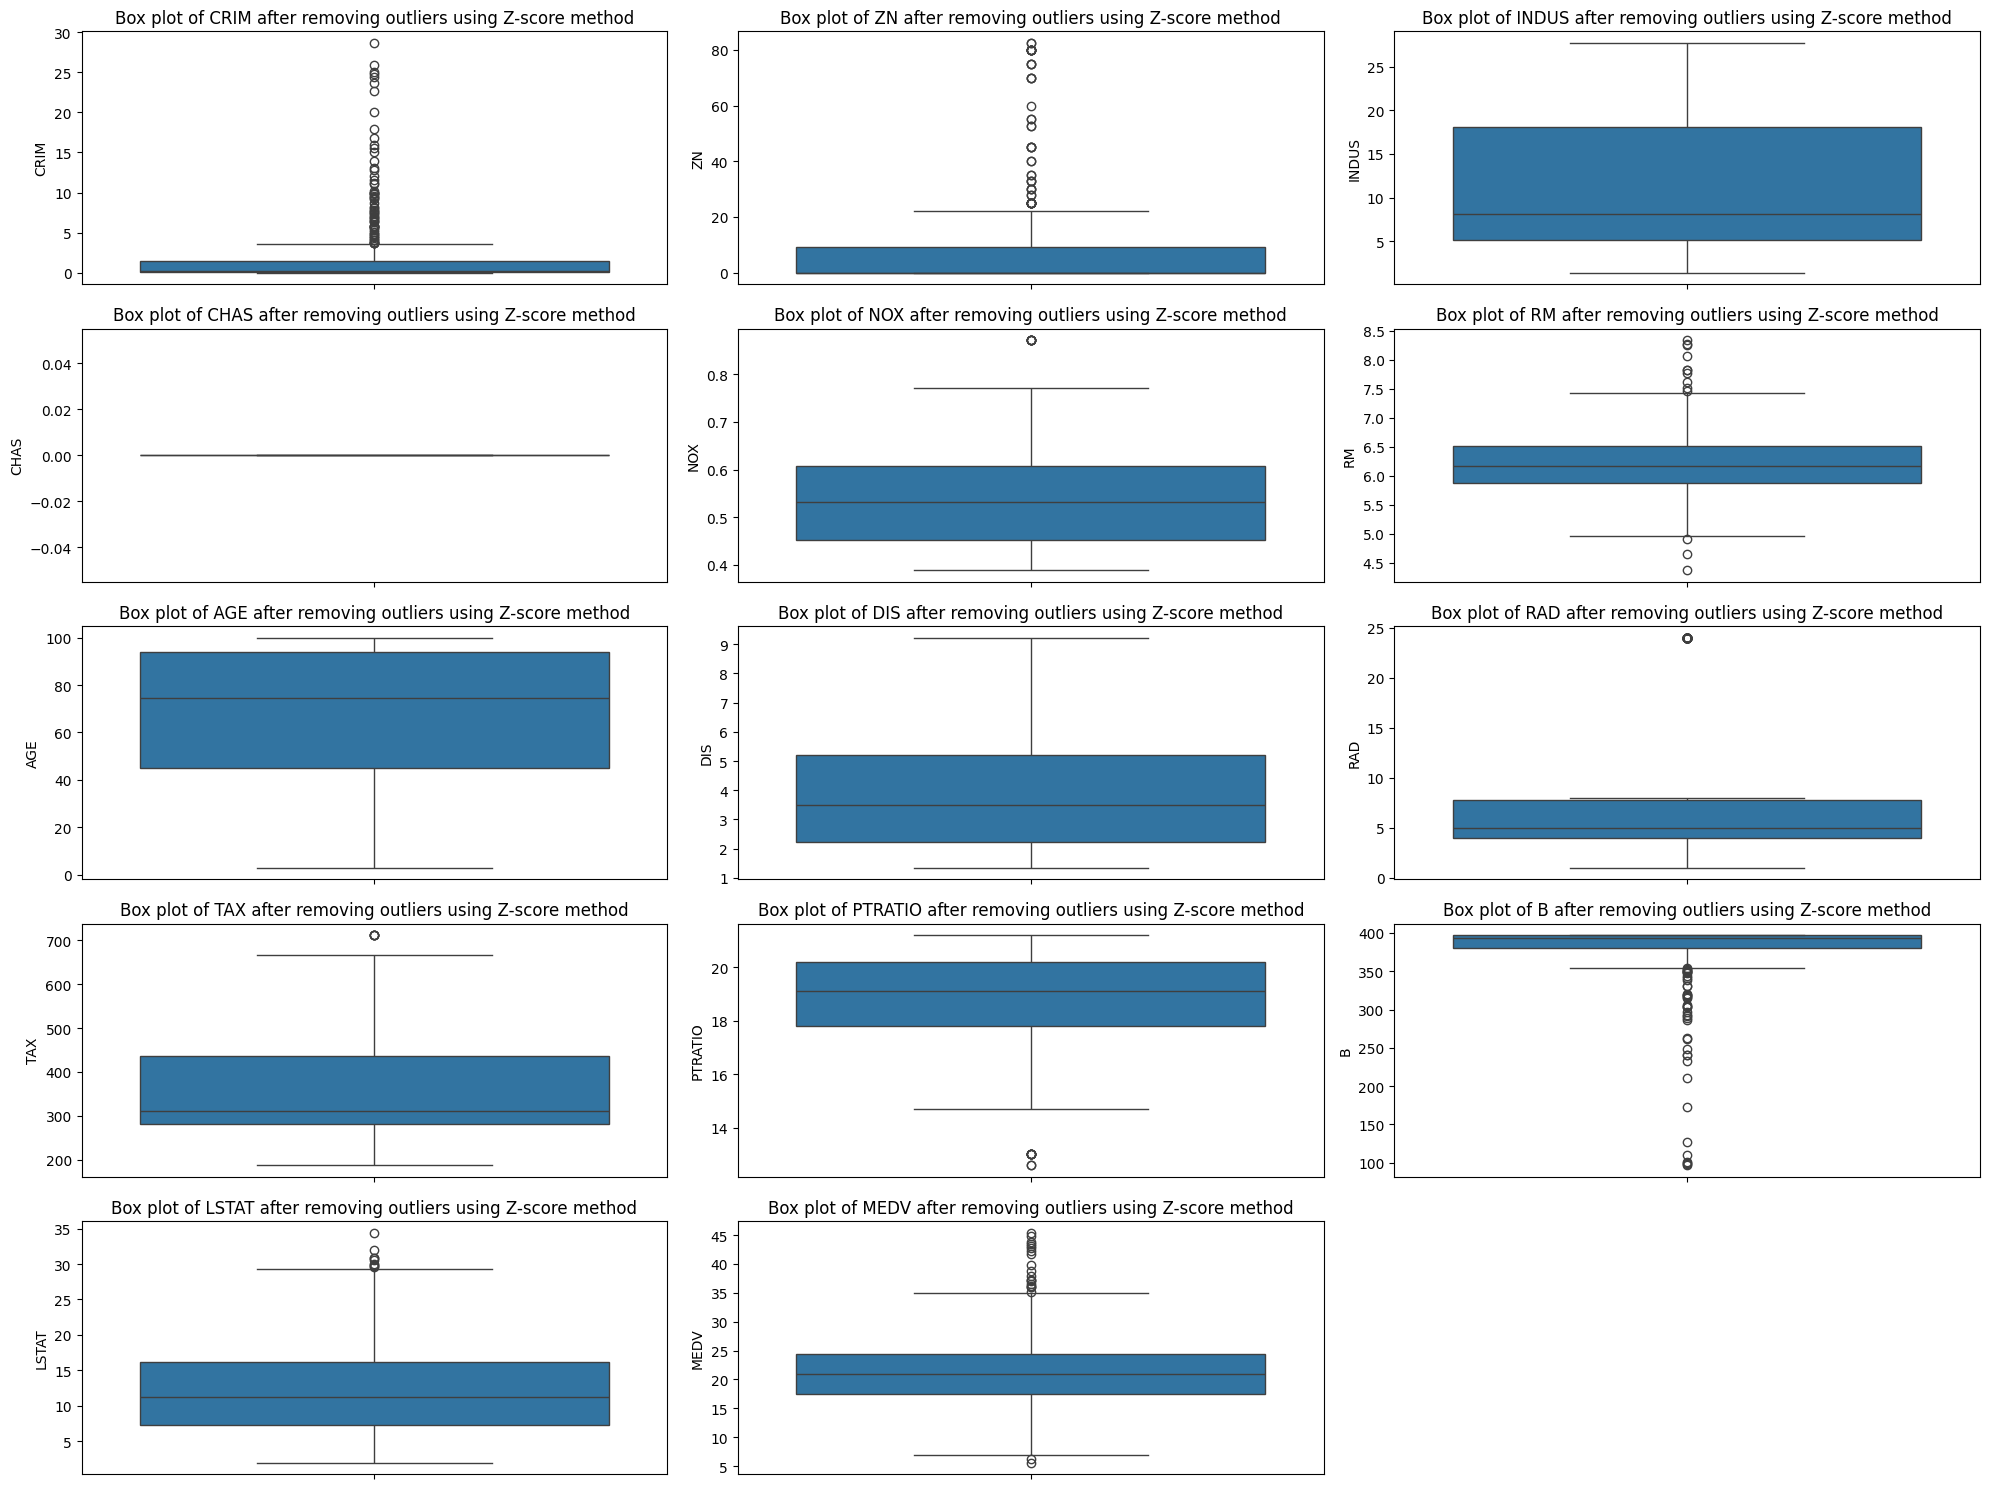

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

df = pd.read_csv("HousingData.csv")
print(df.head())
df = df.dropna()

plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 3, i+1)
    plt.scatter(df[col], df['MEDV'])
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title(f'{col} vs MEDV')
plt.tight_layout()
plt.show()

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print("IQR:\n", IQR)
lowerBound = q1 - 1.5 * IQR
upperBound = q3 + 1.5 * IQR
iqr = df[~((df < lowerBound) | (df > upperBound)).any(axis=1)]

zScores = np.abs(zscore(df))
threshold = 3
zscoredf = df[(zScores < threshold).all(axis=1)]
print("Data without outliers=\n",zscoredf )

plt.figure(figsize=(20, 15))
for i, col in enumerate(iqr.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=iqr[col])
    plt.title(f'Box plot of {col} after removing outliers using IQR')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(zscoredf.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=zscoredf[col])
    plt.title(f'Box plot of {col} after removing outliers using Z-score method')
plt.tight_layout()
plt.show()


Data Imputation in the Retail Sales Dataset
   - Task: Handle missing values in the Retail Sales dataset using advanced imputation techniques like KNN imputation and MICE.
   - Dataset: Retail Sales Dataset


In [11]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
data = pd.read_csv("retail_sales_dataset.csv")
print(data.head())
dataNumeric = data.select_dtypes(include=['number'])
print("\nMissing values before imputation:\n", dataNumeric.isnull().sum())

# K-Nearest Neighbors Imputation
knnImputer = KNNImputer(n_neighbors=3)
knnData = pd.DataFrame(knnImputer.fit_transform(dataNumeric), columns=dataNumeric.columns)
print("\nData after KNN imputation:\n", knnData.head())

# Multiple Imputation by Chained Equations (MICE)
miceImputer = IterativeImputer()
miceDataframe = pd.DataFrame(miceImputer.fit_transform(dataNumeric), columns=dataNumeric.columns)
print("\nData after MICE imputation:\n", miceDataframe.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Missing values before imputation:
 Transaction ID    0
Age               0
Quantity          0
Price per Unit    0
Total Amount      0
dtype: int64

Data after KNN imputation:
    Transaction ID   Age  Quantity  Price per Unit  Total Amount
0             1.0  34.0       3.0          

Feature Engineering in the Heart Disease Dataset
   - Task: Create new features from existing ones in the Heart Disease dataset, such as age groups, cholesterol levels, and more.
   - Dataset: Heart Disease Dataset



In [14]:
import pandas as pd

data = pd.read_csv("heart.csv")
print(data.head())

#Create Age Groups
def categorize_age(age):
    if age < 30:
        return '<30'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    else:
        return '70+'

data['Age_Group'] = data['age'].apply(categorize_age)

#Cholestrol Categories
def categorize_chol(chol):
    if chol <= 200:
        return 'Normal'
    elif 200 < chol <= 240:
        return 'Borderline'
    else:
        return 'High'

data['Cholesterol_Level'] = data['chol'].apply(categorize_chol)

#Calculating BMI
if 'height' in data.columns and 'weight' in data.columns:
    data['BMI'] = data['weight'] / (data['height'] / 100) ** 2

print("\nDataFrame with new features:\n", data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

DataFrame with new features:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148 

 Transforming Variables in the Bike Sharing Dataset
   - Task: Apply transformations like log, square root, and Box-Cox transformations to skewed variables in the Bike Sharing dataset.
   - Dataset: Bike Sharing Dataset



In [27]:
import pandas as pd
import numpy as np
from scipy import stats

dayData = pd.read_csv("day.csv")
hourData = pd.read_csv("hour.csv")
dayData.dropna()
hourData.dropna()
print("Day DataFrame:\n", dayData.head())
print("Hour DataFrame:\n", hourData.head())

def apply_transformations(df, column):
    if column in df.columns:
        df[f'{column}_log'] = np.log1p(df[column])
        df[f'{column}_sqrt'] = np.sqrt(df[column])
        df[f'{column}_boxcox'], _ = stats.boxcox(df[column] + 1)
    return df
dayTransformed = apply_transformations(dayData, 'count')
print("\nTransformed Day DataFrame:\n", dayTransformed.head())

hourTransformed = apply_transformations(hourData, 'count')
print("\nTransformed Hour DataFrame:\n", hourTransformed.head())

combinedData = pd.concat([dayTransformed, hourTransformed], axis=0, ignore_index=True)
print("\nCombined DataFrame:\n", combinedData.head())


Day DataFrame:
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
Hour DataF

 Feature Selection in the Diabetes Dataset
   - Task: Use techniques like correlation analysis, mutual information, and recursive feature elimination (RFE) to select important features in the Diabetes dataset.
   - Dataset: Diabetes Dataset





Original DataFrame:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


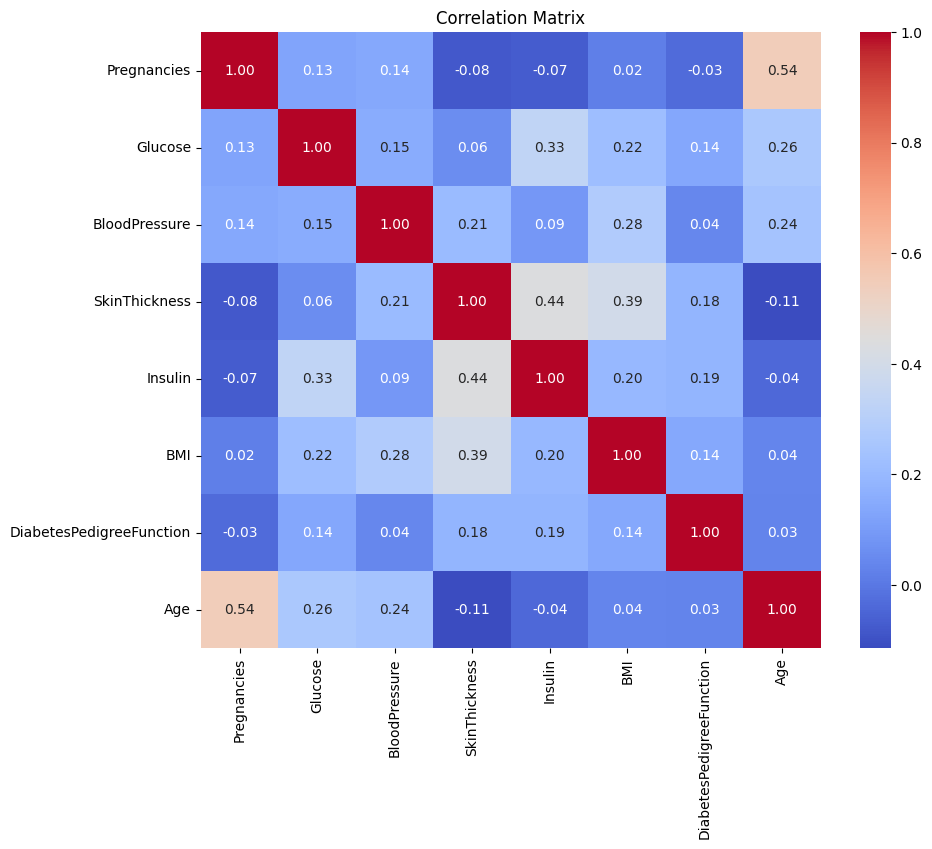


Mutual Information:
                     Feature  Mutual Information
1                   Glucose            0.124531
5                       BMI            0.080534
4                   Insulin            0.046759
2             BloodPressure            0.039001
7                       Age            0.037745
0               Pregnancies            0.017072
3             SkinThickness            0.013868
6  DiabetesPedigreeFunction            0.013497

Top Features based on Mutual Information:
          Feature  Mutual Information
1        Glucose            0.124531
5            BMI            0.080534
4        Insulin            0.046759
2  BloodPressure            0.039001
7            Age            0.037745


In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes.csv")
print("Original DataFrame:\n", data.head())

X = data.drop('Outcome', axis=1)  
y = data['Outcome']

correlMatrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

mutualInfo = mutual_info_classif(X, y)
mutualDf = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutualInfo})
print("\nMutual Information:\n", mutualDf.sort_values(by='Mutual Information', ascending=False))

topFeatures = mutualDf.sort_values(by='Mutual Information', ascending=False).head(5)
print("\nTop Features based on Mutual Information:\n", topFeatures)


Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset
   - Task: Handle imbalanced data in the Credit Card Fraud Detection dataset using techniques like SMOTE, ADASYN, and undersampling.
   - Dataset: Credit Card Fraud Detection Dataset



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

data = pd.read_csv("creditcard.csv")
print(data.head())

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)

#SMOTE
smote = SMOTE(random_state=42)
Xsmote, y_smote = smote.fit_resample(X_trainScaled, y_train)
print("\nAfter SMOTE:\n", pd.Series(y_smote).value_counts())
model.fit(Xsmote, y_smote)
yPredsmote = model.predict(X_testScaled)
print("\nClassification Report with SMOTE:\n", classification_report(y_test, yPredsmote))

#ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_trainScaled, y_train)
print("\nAfter ADASYN:\n", pd.Series(y_adasyn).value_counts())
model.fit(X_adasyn, y_adasyn)
y_pred_adasyn = model.predict(X_testScaled)
print("\nClassification Report with ADASYN:\n", classification_report(y_test, y_pred_adasyn))

#Undersampling
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_trainScaled, y_train)
print("\nAfter Undersampling:\n", pd.Series(y_under).value_counts())
model.fit(X_under, y_under)
y_pred_under = model.predict(X_testScaled)
print("\nClassification Report with Undersampling:\n", classification_report(y_test, y_pred_under))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

 Combining Multiple Datasets in the Movie Lens Dataset
    - Task: Combine and preprocess multiple related datasets from the Movie Lens dataset, such as ratings, user information, and movie metadata.
    - Dataset: Movie Lens Dataset


In [24]:
import pandas as pd
ratings = pd.DataFrame({
    'userId': [1, 2, 3, 4],
    'movieId': [101, 102, 103, 104],
    'rating': [4.0, 5.0, 2.0, 3.0]
})

movies = pd.DataFrame({
    'movieId': [101, 102, 103, 104],
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D'],
    'genres': ['Action|Thriller', 'Comedy', 'Drama', 'Action|Comedy']
})

tags = pd.DataFrame({
    'userId': [1, 2, 3, 4],
    'tag': ['fun', 'serious', 'exciting', 'boring']
})

movies['genres'] = movies['genres'].str.split('|')

ratingMovies = pd.merge(ratings, movies, on='movieId', how='left')
combinedData = pd.merge(ratingMovies, tags, on='userId', how='left')
print("Combined DataFrame:\n", combinedData.head())
print("Missing Values in Combined DataFrame:\n", combinedData.isnull().sum())

cleanedCombinedData = combinedData.dropna()
print("Cleaned Combined DataFrame:\n", cleanedCombinedData.head())



Combined DataFrame:
    userId  movieId  rating    title              genres       tag
0       1      101     4.0  Movie A  [Action, Thriller]       fun
1       2      102     5.0  Movie B            [Comedy]   serious
2       3      103     2.0  Movie C             [Drama]  exciting
3       4      104     3.0  Movie D    [Action, Comedy]    boring

Missing Values in Combined DataFrame:
 userId     0
movieId    0
rating     0
title      0
genres     0
tag        0
dtype: int64

Cleaned Combined DataFrame:
    userId  movieId  rating    title              genres       tag
0       1      101     4.0  Movie A  [Action, Thriller]       fun
1       2      102     5.0  Movie B            [Comedy]   serious
2       3      103     2.0  Movie C             [Drama]  exciting
3       4      104     3.0  Movie D    [Action, Comedy]    boring
